**Import Libraries and Dataset**

In [3]:
import pandas as pd
import seaborn as sns
import sqlite3
import os
import numpy as np
import nbformat
import matplotlib.pyplot as plt
import plotly.tools as tools
import plotly.figure_factory as ff
import plotly.express as px

In [4]:
df_global_game = pd.read_csv('C:\\Users\\Quinn\\Desktop\\video Game Project\\gamesales.project\\vgsales.csv', encoding='latin1')
df_global_game.drop(columns=['Rank'],axis=1,inplace=True)
df_global_game.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Data Cleaning**

In [5]:
year = df_global_game['Year'].unique()
sorted_years = np.sort(year.astype(str))
sorted_years

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2020',
       'Adventure', 'nan'], dtype='<U9')

In [6]:
sort_year = df_global_game.groupby('Year').size().sort_index(ascending=False).reset_index(name='Game_Count')
sort_year.head(5)

,Year,Game_Count
0,Adventure,2
1,2020,1
2,2017,3
3,2016,344
4,2015,614


In [7]:
years_to_remove = ["2017", "2020","unknown"]
df_global_game = df_global_game[~df_global_game['Year'].isin(years_to_remove)]

In [8]:
round(df_global_game.describe(),2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16594.00,16594.00,16594.00,16594.00,16592.00
mean,0.26,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.56
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.04,0.47
max,41.49,29.02,10.22,10.57,82.74


In [9]:
df_global_game.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [10]:
df_clean_game = df_global_game
df_clean_game[['Publisher', 'Year','Globai_Sales']] = df_clean_game[['Publisher', 'Year','Global_Sales']].fillna("unknown")

In [11]:
years_to_remove = ["2017", "2020","unknown"]
df_clean_game = df_global_game[~df_global_game['Year'].isin(years_to_remove)]

In [12]:
genres_to_remove = ["Sony Computer Entertainment", "Idea Factory"]
df_clean_game = df_clean_game[~df_clean_game['Genre'].isin(genres_to_remove)]

In [13]:
df_clean_game.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Globai_Sales    0
dtype: int64

In [14]:
df_clean_game = df_clean_game.drop_duplicates()
df_clean_game.tail(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Globai_Sales
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01,0.01
16597,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01,0.01


In [15]:
df_clean_game['Name'].nunique()

11355

In [16]:
#In data cleaning, to drop the duplicated data and nan data. Because after 2016 the collected game are small in number, to contain the consistency of the dataset, I removed the game data after 2016.

**Global and Region Sales**

In [17]:
df_region_sales = df_clean_game.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']].sum().reset_index()
df_region_sales.columns = [['Genre','NA_Sales_Sum','EU_Sales_Sum','JP_Sales_Sum','Other_Sales_Sum','Global_Sales_Sum']]
df_region_sales

,Genre,NA_Sales_Sum,EU_Sales_Sum,JP_Sales_Sum,Other_Sales_Sum,Global_Sales_Sum
0,Action,861.80,516.48,158.65,184.92,1722.87
1,Adventure,102.06,63.79,51.89,16.70,234.68
2,Fighting,220.74,100.00,87.15,36.19,444.05
3,Misc,402.48,213.82,106.67,74.02,797.62
4,Platform,445.99,200.67,130.65,51.51,829.15
5,Puzzle,122.01,50.53,56.68,12.47,242.22
6,Racing,356.93,236.32,56.61,76.68,726.77
7,Role-Playing,326.50,187.58,350.25,59.38,923.80
8,Shooter,575.16,310.45,38.18,101.90,1026.20
9,Simulation,181.51,113.20,63.54,31.34,389.87


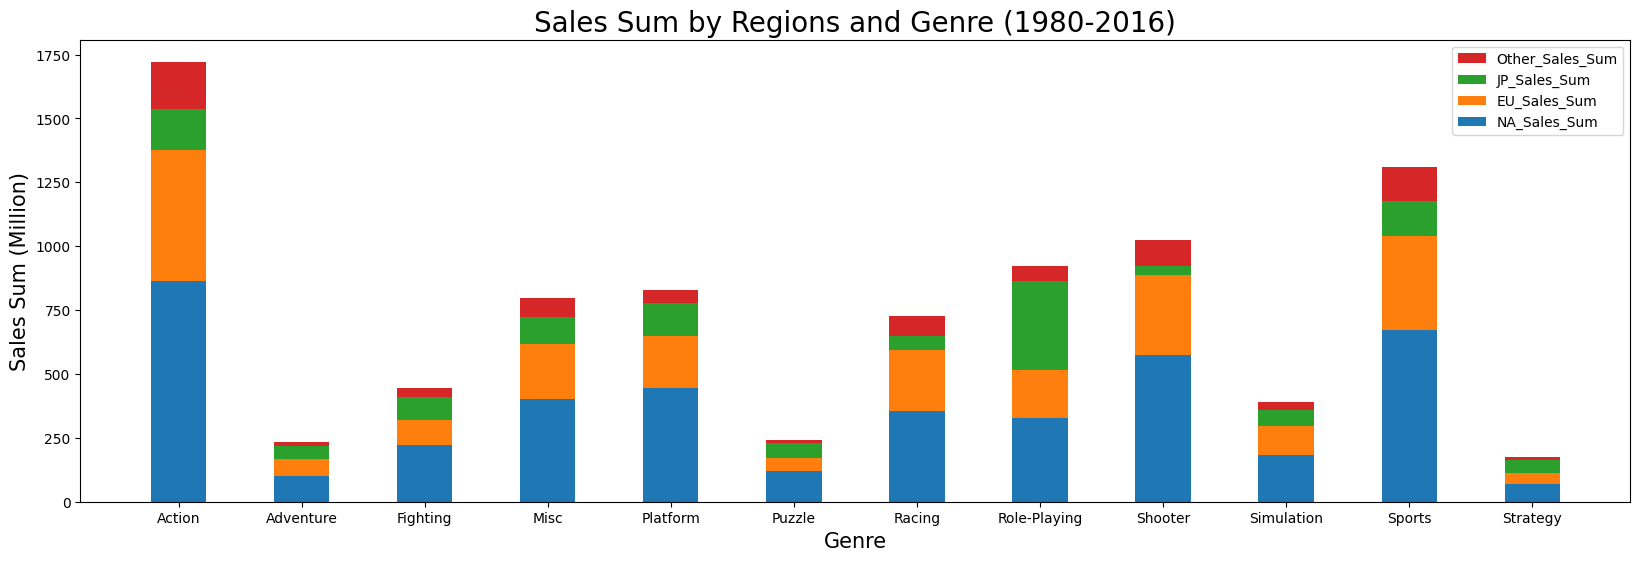

In [18]:
data = {
    'Genre': ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'],
    'NA_Sales_Sum': [861.80, 102.06, 220.74, 402.48, 445.99, 122.01, 356.93, 326.50, 575.16, 181.51, 670.09, 67.89],
    'EU_Sales_Sum': [516.48, 63.79, 100.00, 213.82, 200.67, 50.53, 236.32, 187.58, 310.45, 113.20, 371.34, 44.94],
    'JP_Sales_Sum': [158.65, 51.89, 87.15, 106.67, 130.65, 56.68, 56.61, 350.25, 38.18, 63.54, 134.76, 49.10],
    'Other_Sales_Sum': [184.92, 16.70, 36.19, 74.02, 51.51, 12.47, 76.68, 59.38, 101.90, 31.34, 132.65, 11.23],
    'Global_Sales_Sum': [1722.87, 234.68, 444.05, 797.62, 829.15, 242.22, 726.77, 923.80, 1026.20, 389.87, 1309.24, 173.43],
}

result_df = pd.DataFrame(data)

genres = result_df['Genre'].tolist()
sales_columns = ['NA_Sales_Sum','EU_Sales_Sum','JP_Sales_Sum','Other_Sales_Sum']
bar_width = 0.45
fig, ax = plt.subplots(figsize=(20, 6))

bottom = np.zeros(len(genres))

legend_handles = []
legend_labels = []

for col in sales_columns:
    bars = ax.bar(genres, result_df[col], bar_width, label=col, bottom=bottom)
    bottom += result_df[col]
    legend_handles.append(bars[0])
    legend_labels.append(col)

new_legend_order = ['Other_Sales_Sum', 'JP_Sales_Sum', 'EU_Sales_Sum', 'NA_Sales_Sum']
new_handles = [legend_handles[legend_labels.index(label)] for label in new_legend_order]

ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Sales Sum (Million)', fontsize=15)
ax.set_title('Sales Sum by Regions and Genre (1980-2016)', fontsize=20)
ax.legend(handles=new_handles, labels=new_legend_order)
#plt.figtext(0.90, 0.91, 'Counting Unit: Million', ha='right', va='top', fontsize=12, color='black')
plt.show()

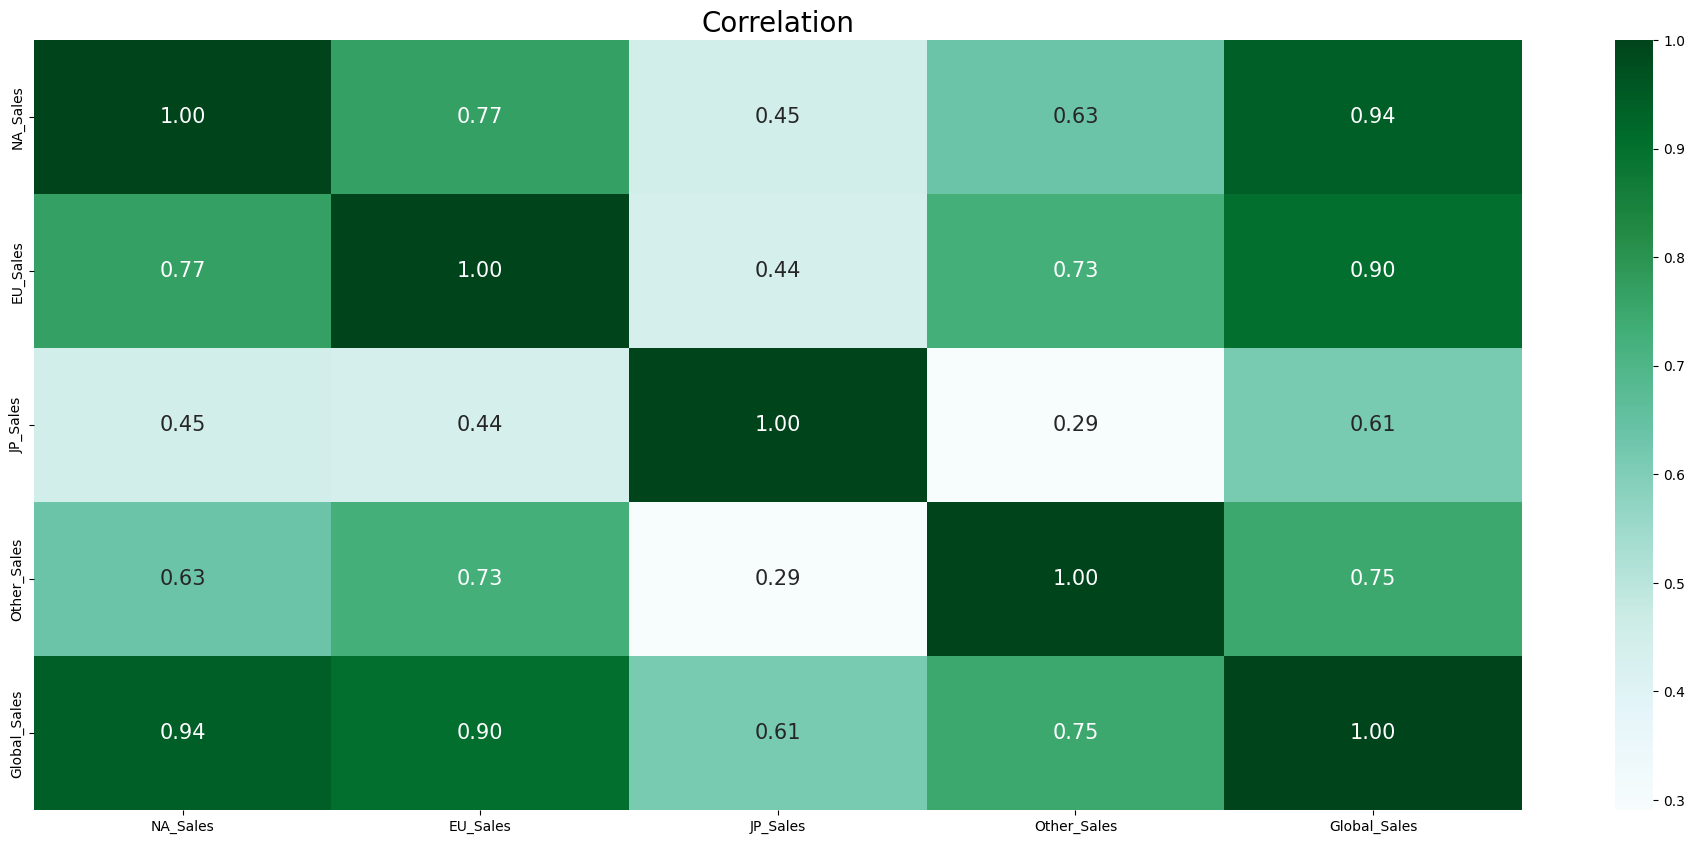

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df_without_year = df_clean_game.drop(columns=['Year'])
fig, ax = plt.subplots(figsize=(24, 10))

# Set the font size for annotations
annot_kws = {'size': 15}

sns.heatmap(df_without_year.corr(numeric_only=True), annot=True, cmap='BuGn', fmt='.2f', annot_kws=annot_kws)

plt.gca().set_title('Correlation', fontsize=20)
plt.show()


In [20]:
#try to know the relationship about the region sales and global sales. Here I have use multiple linear regression to build a least-squared equation, can used to calculate the global sales, by knowing the region sales.

In [21]:
import statsmodels.api as sm
independent_variables = ['NA_Sales', 'JP_Sales', 'EU_Sales']
dependent_variable = 'Global_Sales'

X = df_clean_game[independent_variables]
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(df_clean_game[dependent_variable], X).fit()

print("Multiple Linear Regression Results:")
print(model.summary())

Multiple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 8.058e+05
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:54:46   Log-Likelihood:                 10365.
No. Observations:               16321   AIC:                        -2.072e+04
Df Residuals:                   16317   BIC:                        -2.069e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

**Overview about Genre & Sales**

Top 5 best-saling game per decade

In [22]:
df_clean_game['Year'] = df_clean_game['Year'].astype(int)
df_top5_game_2010_2016 = df_clean_game[(df_clean_game['Year'] >= 2010) & (df_clean_game['Year'] <= 2016)].nlargest(5, 'Global_Sales')[['Name', 'Genre', 'Year', 'Global_Sales']]
df_top5_game_2010_2016

,Name,Genre,Year,Global_Sales
15,Kinect Adventures!,Misc,2010,21.82
16,Grand Theft Auto V,Action,2013,21.40
23,Grand Theft Auto V,Action,2013,16.38
26,Pokemon Black/Pokemon White,Role-Playing,2010,15.32
29,Call of Duty: Modern Warfare 3,Shooter,2011,14.76


In [23]:
df_top5_game_2000_2009 = df_clean_game[(df_clean_game['Year'] >= 2000) & (df_clean_game['Year'] <= 2009)].nlargest(5, 'Global_Sales')[['Name', 'Genre', 'Year', 'Global_Sales']]
df_top5_game_2000_2009

,Name,Genre,Year,Global_Sales
0,Wii Sports,Sports,2006,82.74
2,Mario Kart Wii,Racing,2008,35.82
3,Wii Sports Resort,Sports,2009,33.00
6,New Super Mario Bros.,Platform,2006,30.01
7,Wii Play,Misc,2006,29.02


In [24]:
df_top5_game_1990_1999 = df_clean_game[(df_clean_game['Year'] >= 1990) & (df_clean_game['Year'] <= 1999)].nlargest(5, 'Global_Sales')[['Name', 'Genre', 'Year', 'Global_Sales']]
df_top5_game_1990_1999

,Name,Genre,Year,Global_Sales
4,Pokemon Red/Pokemon Blue,Role-Playing,1996,31.37
12,Pokemon Gold/Pokemon Silver,Role-Playing,1999,23.10
18,Super Mario World,Platform,1990,20.61
30,PokÃ©mon Yellow: Special Pikachu Edition,Role-Playing,1998,14.64
46,Super Mario 64,Platform,1996,11.89


In [25]:
df_top5_game_1980_1989 = df_clean_game[(df_clean_game['Year'] >= 1980) & (df_clean_game['Year'] <= 1989)].nlargest(5, 'Global_Sales')[['Name', 'Genre', 'Year', 'Global_Sales']]
df_top5_game_1980_1989

,Name,Genre,Year,Global_Sales
1,Super Mario Bros.,Platform,1985,40.24
5,Tetris,Puzzle,1989,30.26
9,Duck Hunt,Shooter,1984,28.31
21,Super Mario Land,Platform,1989,18.14
22,Super Mario Bros. 3,Platform,1988,17.28


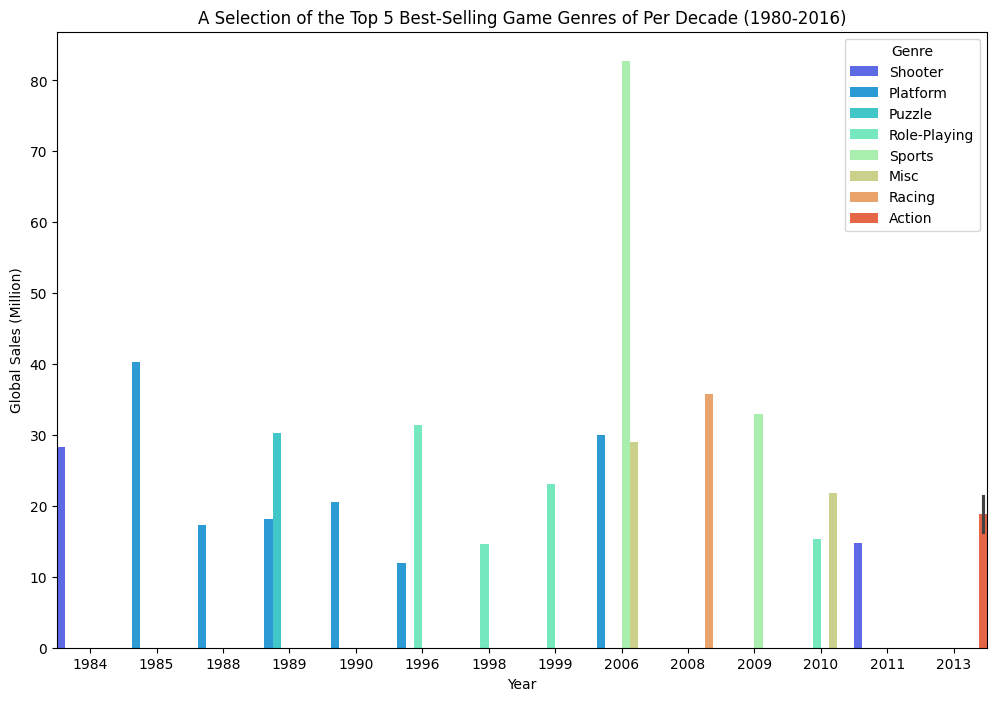

In [26]:
# Concatenate DataFrames for different time periods
df_combined = pd.concat([df_top5_game_2010_2016, df_top5_game_2000_2009, df_top5_game_1990_1999, df_top5_game_1980_1989], ignore_index=True)

# Function to plot top 5 games for each time period
def plot_top5_games(df_combined, title):
    plt.figure(figsize=(12, 8))
    
    # Increase the bar width by adjusting the width parameter
    sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=df_combined, dodge=True, palette='rainbow', 
                width=1)
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Global Sales (Million)')
    plt.show()

# Plot top 5 games for all time periods
plot_top5_games(df_combined, 'A Selection of the Top 5 Best-Selling Game Genres of Per Decade (1980-2016)')



In [27]:
#From this plot we can know, before 2000 the platform have better sales than other genres. After 2000, more genres become popular (Sports and Action).

In [28]:
df_publisher_sales = df_clean_game.groupby('Publisher')['Global_Sales'].sum().reset_index()
df_top10_publisher_sales = df_publisher_sales.nlargest(10, 'Global_Sales')

print(df_top10_publisher_sales)

                        Publisher  Global_Sales
359                      Nintendo       1784.43
138               Electronic Arts       1093.39
21                     Activision        721.41
455   Sony Computer Entertainment        607.20
524                       Ubisoft        473.25
493          Take-Two Interactive        399.30
487                           THQ        340.44
275  Konami Digital Entertainment        278.56
445                          Sega        270.66
347            Namco Bandai Games        253.65


In [29]:
#We can see the Nintendo is a very important game publisher during this time span.

**Specific Genre & Global Sales**

In [30]:
new_data = {'Genre': ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
            'genre_sum': [3316, 2346, 1739, 1488, 1309, 1284, 1249, 886, 867, 848, 681, 582]}

new_df = pd.DataFrame(new_data)

old_df = pd.DataFrame({
    'Genre': ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'],
    'gl_sum': [1751.18, 238.92, 448.91, 809.96, 831.37, 244.95, 732.04, 927.37, 1037.35, 392.20, 1330.93, 175.12],
    'gl_mean': [0.528100, 0.186075, 0.529375, 0.465762, 0.938341, 0.420876, 0.586101, 0.623233, 0.792475, 0.452364, 0.567319, 0.257151]
})

result_df = old_df.merge(new_df, on='Genre', how='left')
print(result_df)

           Genre   gl_sum   gl_mean  genre_sum
0         Action  1751.18  0.528100       3316
1      Adventure   238.92  0.186075       1284
2       Fighting   448.91  0.529375        848
3           Misc   809.96  0.465762       1739
4       Platform   831.37  0.938341        886
5         Puzzle   244.95  0.420876        582
6         Racing   732.04  0.586101       1249
7   Role-Playing   927.37  0.623233       1488
8        Shooter  1037.35  0.792475       1309
9     Simulation   392.20  0.452364        867
10        Sports  1330.93  0.567319       2346
11      Strategy   175.12  0.257151        681


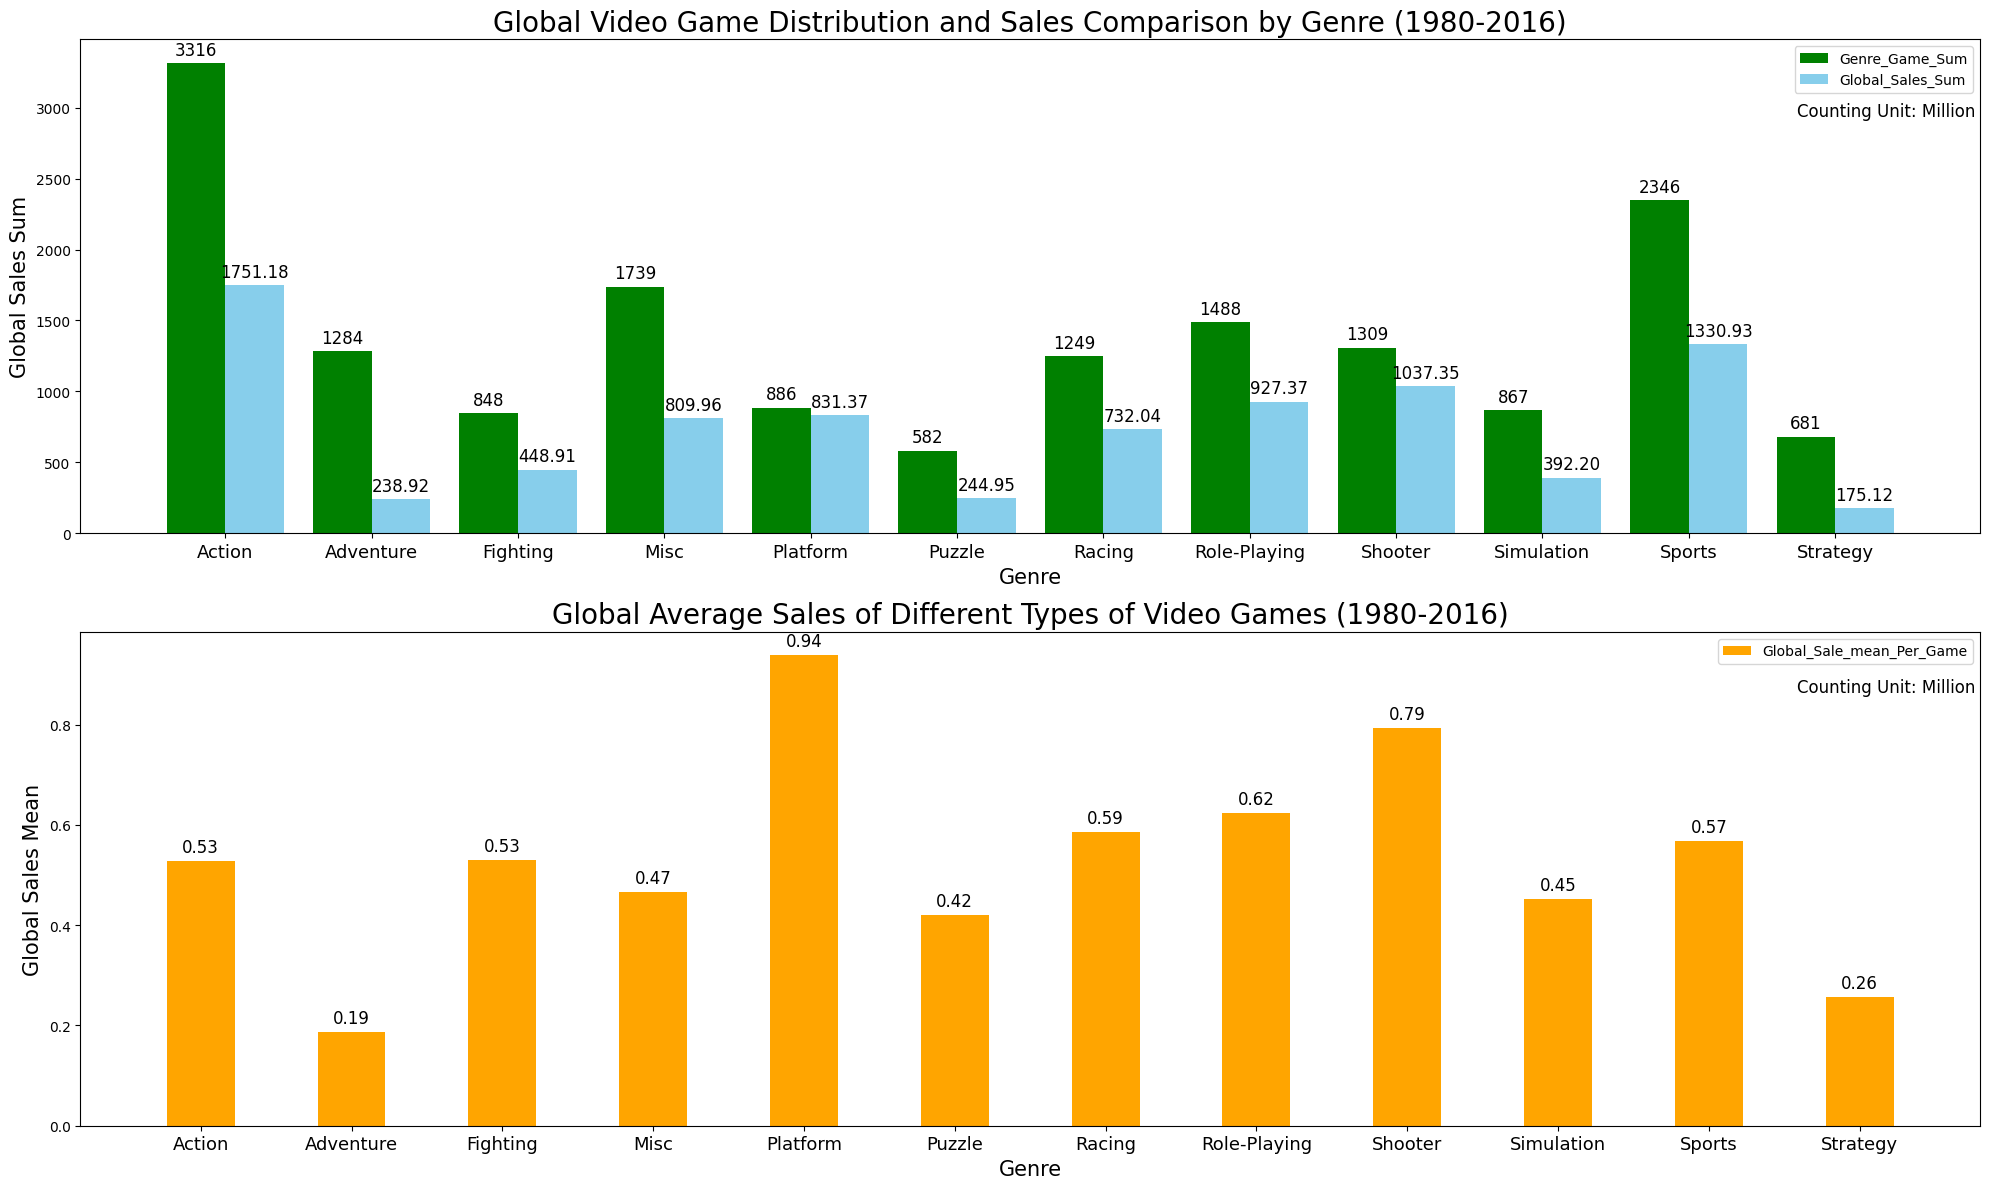

In [31]:
genres = result_df['Genre']
gl_sales_sum = result_df['gl_sum']
genre_game_sum = result_df['genre_sum']
gl_mean = result_df['gl_mean']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

# Bar plot for Game Count and Game Sales Sum in the upper subplot
bar_width = 0.40
index = np.arange(len(genres))
bar1 = ax1.bar(index, genre_game_sum, bar_width, label='Genre_Game_Sum', color='green')
bar2 = ax1.bar(index + bar_width, gl_sales_sum, bar_width, label='Global_Sales_Sum', color='skyblue')

ax1.set_xticks(index + bar_width / 2)
ax2.set_xticks(index)

for i, v in enumerate(genre_game_sum):
    ax1.text(i, v + 30, str(v), ha='center', va='bottom', color='black', fontsize=12)

for i, v in enumerate(gl_sales_sum):
    ax1.text(i + bar_width, v + 30, f'{v:.2f}', ha='center', va='bottom', color='black', fontsize=12)

ax1.set_xlabel('Genre', fontsize=15)
ax1.set_ylabel('Global Sales Sum', fontsize=15)
ax1.set_title('Global Video Game Distribution and Sales Comparison by Genre (1980-2016)', fontsize=20)
ax1.set_xticklabels(genres,fontsize=13)
ax1.legend()

# Bar plot for Global Sales Mean in the lower subplot
bar_width = 0.45
index = np.arange(len(genres))
bar3 = ax2.bar(index, gl_mean, bar_width, label='Global_Sale_mean_Per_Game', color='orange')

for i, v in enumerate(gl_mean):
    ax2.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', color='black', fontsize=12)

ax2.set_xlabel('Genre', fontsize=15)
ax2.set_ylabel('Global Sales Mean', fontsize=15)
ax2.set_title('Global Average Sales of Different Types of Video Games (1980-2016)', fontsize=20)
ax2.set_xticks(index)
ax2.set_xticklabels(genres,fontsize=13)
ax2.legend()
plt.figtext(0.99, 0.91, 'Counting Unit: Million', ha='right', va='top', fontsize=12, color='black')
plt.figtext(0.99, 0.43, 'Counting Unit: Million', ha='right', va='top', fontsize=12, color='black')
# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
#Action game have the highest sales and highest game counts, but every action game can sale half a million. The game number and sale of platform game not that high, but platform game have the highest average sales. Almost per platform game can sale one million.

In [33]:
df_year_genre_sale = df_clean_game.groupby(['Genre', 'Year'])['Global_Sales'].agg('sum').reset_index()
df_year_genre_sale.tail(3)

,Genre,Year,Global_Sales
383,Strategy,2014,0.99
384,Strategy,2015,1.82
385,Strategy,2016,0.50


In [34]:
df_year_genre_count = df_clean_game.groupby(['Genre', 'Year']).size().reset_index(name='Game_Count')
df_year_genre_count.tail(3)

,Genre,Year,Game_Count
383,Strategy,2014,8
384,Strategy,2015,17
385,Strategy,2016,10


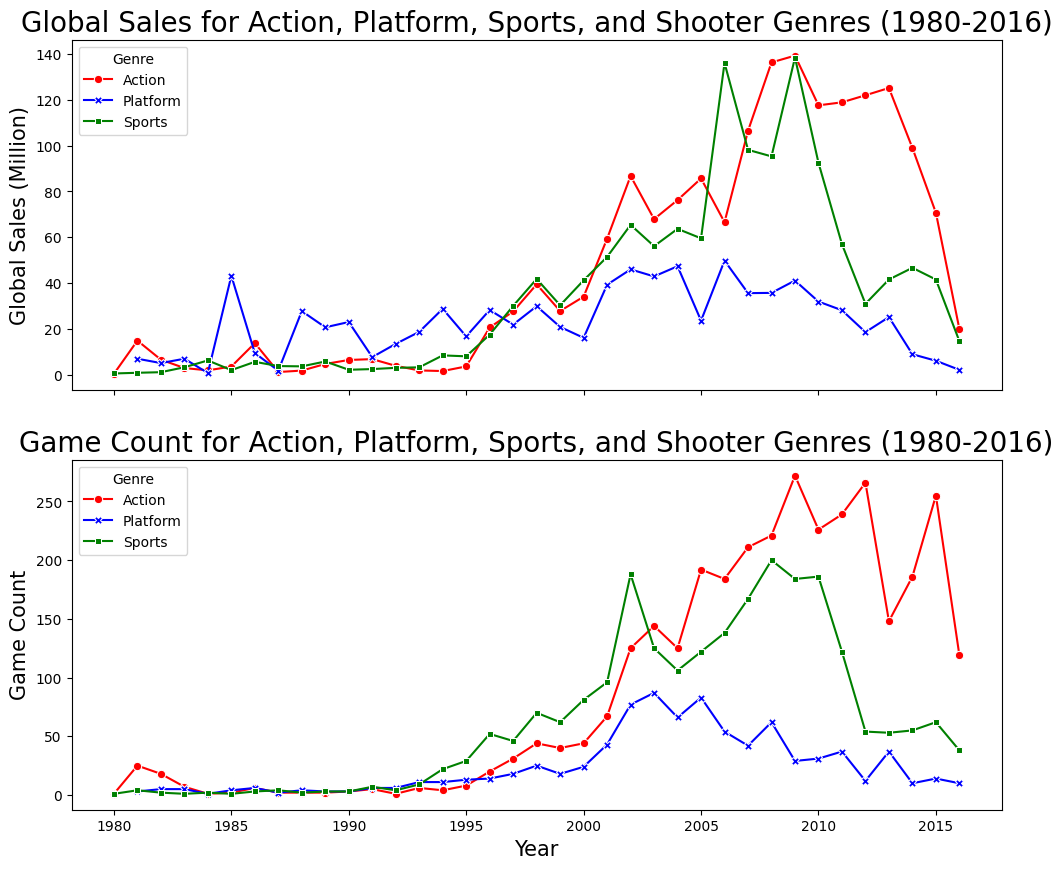

In [35]:
# genres_to_compare remains the same
genres_to_compare = ['Action', 'Platform', 'Sports']

# Define custom colors for each genre
custom_palette = {'Action': 'red', 'Platform': 'blue', 'Sports': 'green'}

# Filter data
df_sales_filtered = df_year_genre_sale[df_year_genre_sale['Genre'].isin(genres_to_compare)]
df_count_filtered = df_year_genre_count[df_year_genre_count['Genre'].isin(genres_to_compare)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Global Sales
sns.lineplot(data=df_sales_filtered, x='Year', y='Global_Sales', hue='Genre', style='Genre',
             markers=True, dashes=False, ax=ax1, palette=custom_palette)
ax1.set_title('Global Sales for Action, Platform, Sports, and Shooter Genres (1980-2016)', fontsize=20)
ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Global Sales (Million)', fontsize=15)

# Plot Game Count
sns.lineplot(data=df_count_filtered, x='Year', y='Game_Count', hue='Genre', style='Genre',
             markers=True, dashes=False, ax=ax2, palette=custom_palette)
ax2.set_title('Game Count for Action, Platform, Sports, and Shooter Genres (1980-2016)', fontsize=20)
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Game Count', fontsize=15)

plt.show()

In [36]:
#From this plot we can see, before 2000 platform game is a very important contributor for global sales. (The release of popular platform game series: "Super Mario Bros." )

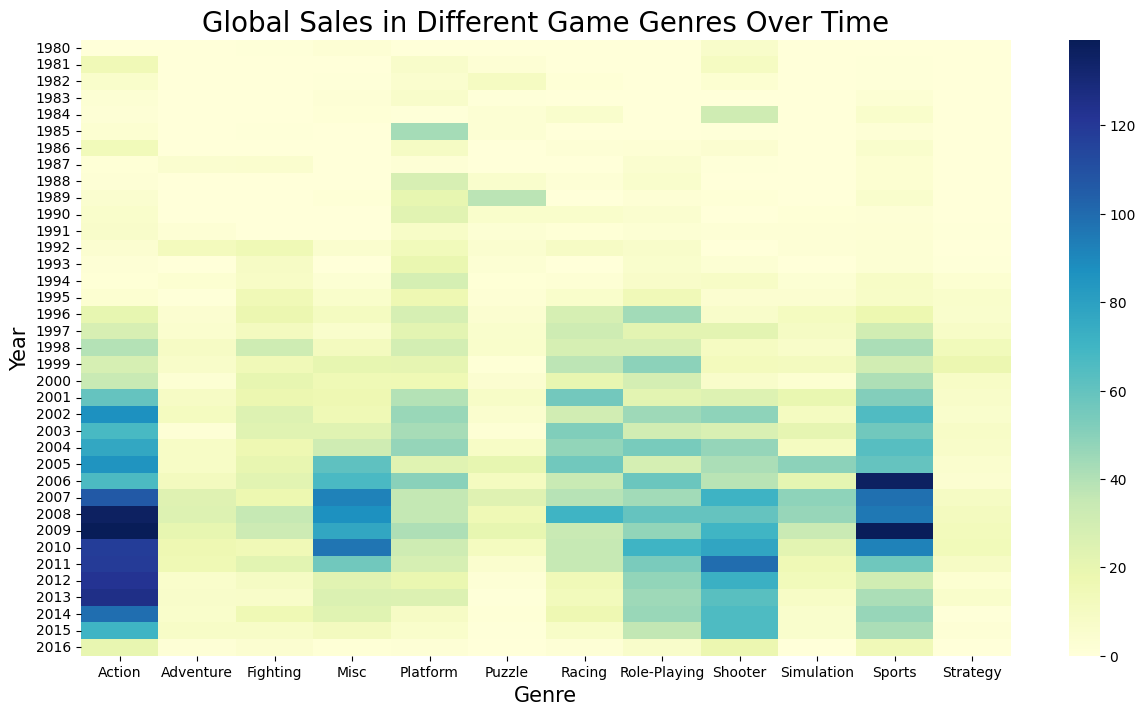

In [37]:
genre_yearly_sales = df_clean_game.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

# Creating subplots for genres and publishers
fig, ax = plt.subplots(1, figsize=(15, 8))  # Use plt.subplots instead of plt.plots

# Plotting the popularity of different genres over time
sns.heatmap(genre_yearly_sales, ax=ax, cmap="YlGnBu")
ax.set_title('Global Sales in Different Game Genres Over Time', fontsize=20)
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Year', fontsize=15)

plt.show()



In [38]:
#From this plot we can testify that after 2000 Action game and Sports game become popular. Around 2008 and 2009 at the peak. But after 2010, the sales of these two genres faced decreased trend.

**Significance test about Sales & Genres**

C:\Users\Quinn\AppData\Local\Temp\ipykernel_12840\4248581706.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



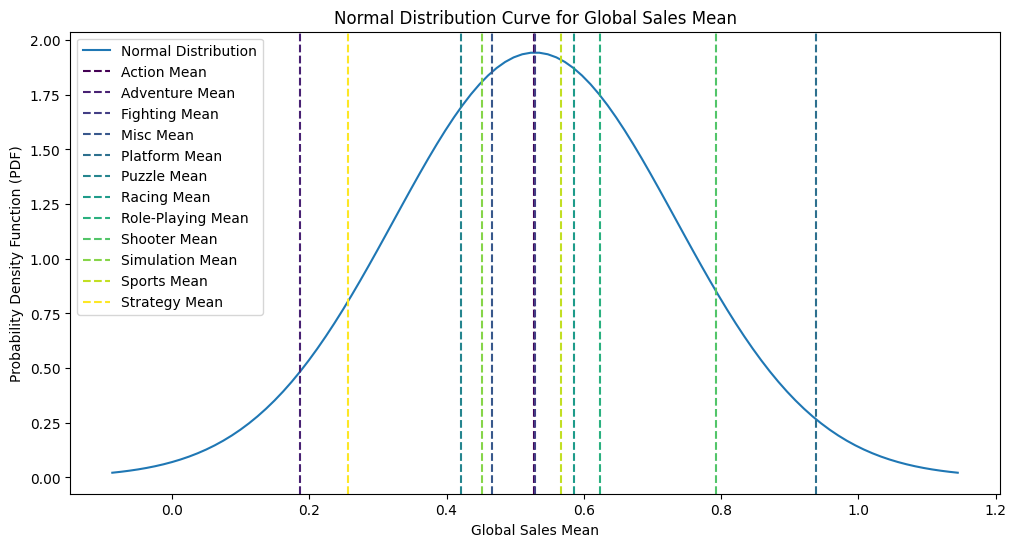

In [39]:
from scipy.stats import norm

# Your DataFrame
df = pd.DataFrame(result_df)

# Parameters for the normal distribution
mu = df['gl_mean'].mean()  # mean
sigma = df['gl_mean'].std()  # standard deviation

# Create a color map for each genre
color_map = plt.cm.get_cmap('viridis', len(df['Genre']))

# Generate data points for the x-axis
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Set the size of the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the normal distribution curve
ax.plot(x, norm.pdf(x, mu, sigma), label='Normal Distribution')

# Plot vertical lines for each genre's mean with different colors
for index, mean_value in enumerate(df['gl_mean']):
    color = color_map(index)
    ax.axvline(x=mean_value, color=color, linestyle='--', label=f'{df.loc[index, "Genre"]} Mean', alpha=1)

# Add labels and a legend
ax.set_title('Normal Distribution Curve for Global Sales Mean')
ax.set_xlabel('Global Sales Mean')
ax.set_ylabel('Probability Density Function (PDF)')
ax.legend()

# Show the plot
plt.show()



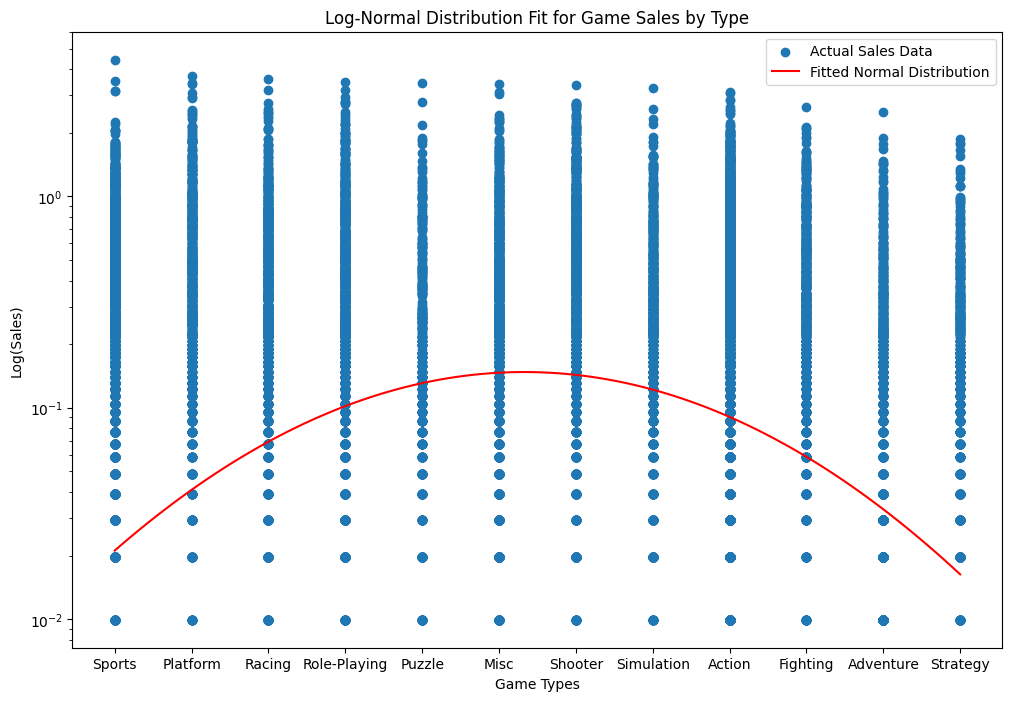

In [40]:
from scipy.stats import norm
from scipy.optimize import curve_fit

# Assuming df_clean_game is your actual DataFrame with the necessary columns
# Extract Genre and Global_Sales columns from df_clean_game
game_types = df_clean_game['Genre']
sales_data = df_clean_game['Global_Sales']

# Convert Genre to numerical values
unique_genres = game_types.unique()
genre_mapping = {genre: i for i, genre in enumerate(unique_genres)}
game_types_numeric = game_types.map(genre_mapping)

# Use a log scale for the sales data
sales_data_log = np.log1p(sales_data)

def normal_distribution(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(12, 8))
params, covariance = curve_fit(normal_distribution, game_types_numeric, sales_data_log)

plt.scatter(game_types_numeric, sales_data_log, label='Actual Sales Data')

x_range = np.linspace(min(game_types_numeric), max(game_types_numeric), 100)
fitted_curve = normal_distribution(x_range, *params)
plt.plot(x_range, fitted_curve, label='Fitted Normal Distribution', color='red')
tick_labels = [genre for genre, idx in sorted(genre_mapping.items(), key=lambda x: x[1])]
plt.xticks(np.arange(len(tick_labels)), tick_labels)

plt.yscale('log')

plt.xlabel('Game Types')
plt.ylabel('Log(Sales)')
plt.legend()
plt.title('Log-Normal Distribution Fit for Game Sales by Type')
plt.show()




In [41]:
variance_by_type = df_clean_game.groupby('Genre')['Global_Sales'].var()
variance_by_type

Genre
Action          1.357439
Adventure       0.261017
Fighting        0.917602
Misc            1.751117
Platform        6.752942
Puzzle          2.484647
Racing          2.811560
Role-Playing    2.951405
Shooter         3.362009
Simulation      1.454987
Sports          4.430715
Strategy        0.274783
Name: Global_Sales, dtype: float64

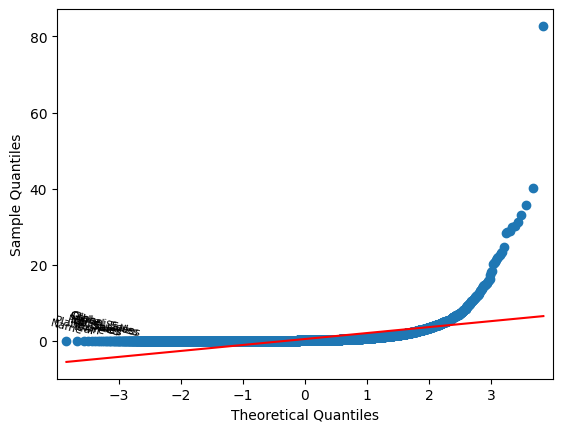

In [42]:
qq_plot = sm.qqplot(df_clean_game['Global_Sales'].values, line='s', markerfacecolor='C0', markeredgecolor='C0')

# Annotate each point with its genre
for i, txt in enumerate(df_clean_game[df_clean_game['Genre'] == 'Platform']):
    x, y = qq_plot.axes[0].get_lines()[0].get_data()
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,5), ha='center', rotation=345, fontsize=8)

# Show the plot
plt.show()

In [43]:
#From this QQ-Plot we can know the dataset is not normal distributed, it's not possible to use ANOVA to conduct significance test.

In [44]:
#Thus I choose to conduct Kruskal-Wallis test. The Kruskal-Wallis test can be used to compare differences between a categorical (category) variable and a continuous (scale) variable. Kruskal-Wallis is a non-parametric test designed to examine whether there are significant differences among multiple independent groups, without the assumption that the data follows a normal distribution.


In [49]:
from scipy.stats import kruskal
from scipy.stats import kendalltau

# Assuming df_clean_game is your DataFrame
data = [df_clean_game['Global_Sales'][df_clean_game['Genre'] == genre] for genre in df_clean_game['Genre'].unique()]
# Kruskal-Wallis Test
statistic, p_value = kruskal(*data)
tau, p_value = kendalltau(df_clean_game['Genre'], df_clean_game['Global_Sales'])
print("Kruskal-Wallis Statistic:", statistic)
print("P-Value:", p_value)
print("Kendall's W:", tau)


Kruskal-Wallis Statistic: 972.0957177737225
P-Value: 1.9214927388941343e-09
Kendall's W: 0.03325870473885651
